In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense

Using TensorFlow backend.


In [2]:
df = pd.read_csv('data/nyc_taxi.csv', engine='python')
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [3]:
df.shape

(10320, 2)

In [4]:
# Convert the timestamp string to datetime datatype (year, month, day, hour)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [5]:
# Setperating the timestamp columns into seperate columns
df['Year'] = df.timestamp.dt.year
df['Month'] = df.timestamp.dt.month
df['Day'] = df.timestamp.dt.day
df['Hour'] = df.timestamp.dt.hour
df.head()

,timestamp,value,Year,Month,Day,Hour
0,2014-07-01 00:00:00,10844,2014,7,1,0
1,2014-07-01 00:30:00,8127,2014,7,1,0
2,2014-07-01 01:00:00,6210,2014,7,1,1
3,2014-07-01 01:30:00,4656,2014,7,1,1
4,2014-07-01 02:00:00,3820,2014,7,1,2


In [6]:
# Checking the unique values available in each column
print('Unique number of years: ', df.Year.unique())
print('Unique number of months: ', df.Month.unique())
print('Unique number of days: ', df.Day.unique())
print('Unique number of hours: ', df.Hour.unique())

Unique number of years:  [2014 2015]
Unique number of months:  [ 7  8  9 10 11 12  1]
Unique number of days:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Unique number of hours:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [7]:
df['value'].mean()

15137.569379844961

/Users/mohammedalhamid/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


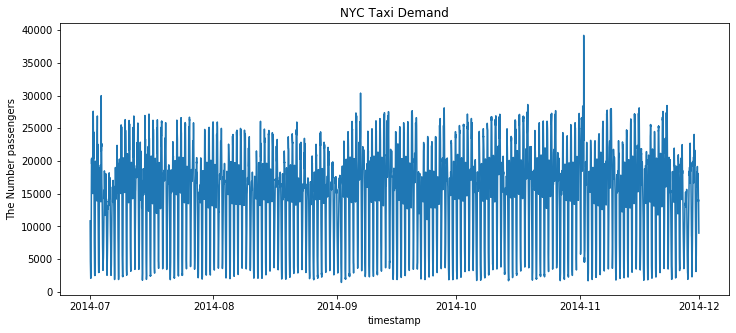

In [8]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df.iloc[0:7344]['timestamp'], df.iloc[0:7344]['value'])
ax.set_title('NYC Taxi Demand')
plt.xlabel('timestamp')
plt.ylabel('The Number passengers')
plt.show()

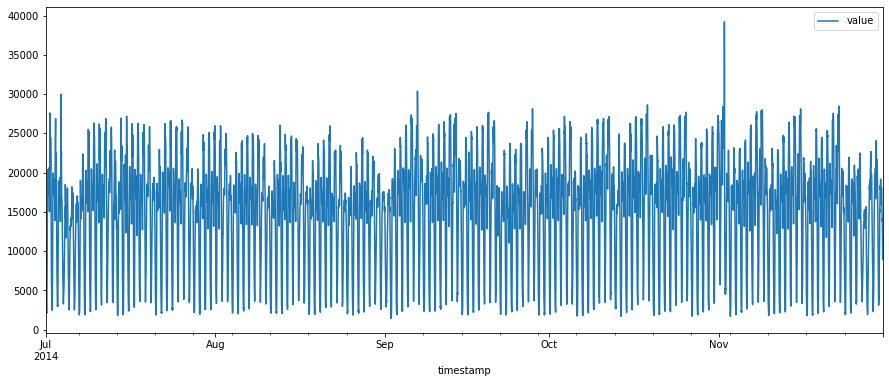

In [9]:
# Plotting a sample of the data
# July, 2014 ~ November 2014
df.iloc[0:7344,:].plot(y='value', x='timestamp', figsize=(15,6))

In [10]:
df.shape

(10320, 6)

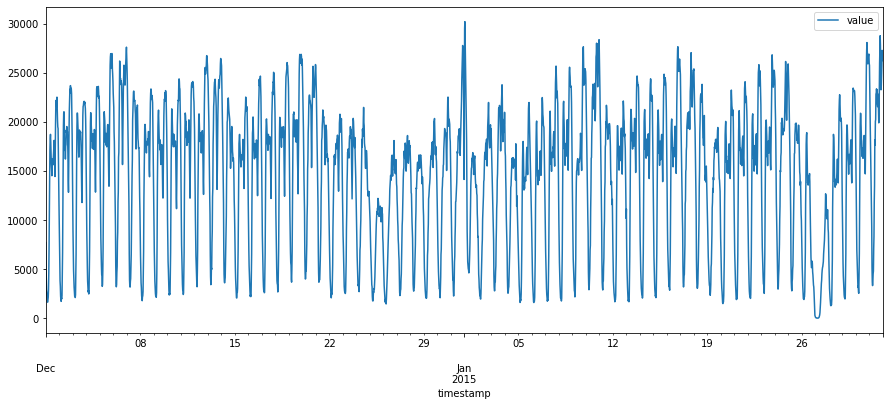

In [11]:
# Plotting a sample of the data
# December, 2014 ~ January 201
df.iloc[7344:10320,:].plot(y='value', x='timestamp', figsize=(15,6))

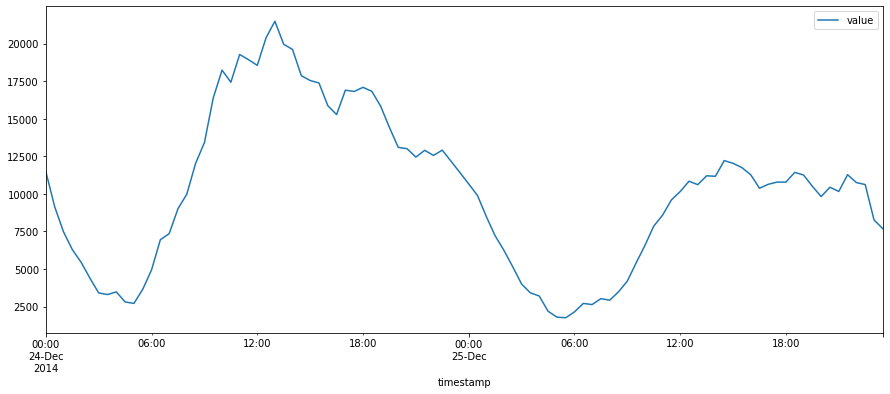

In [12]:
# December 24 ~ December 25
df.iloc[8448:8544,:].plot(y='value', x='timestamp', figsize=(15,6))

In [13]:
# Number of readings per day
df[(df['Day'] == 1) & (df['Month'] == 7) & (df['Year'] == 2014)]

,timestamp,value,Year,Month,Day,Hour
0,2014-07-01 00:00:00,10844,2014,7,1,0
1,2014-07-01 00:30:00,8127,2014,7,1,0
2,2014-07-01 01:00:00,6210,2014,7,1,1
3,2014-07-01 01:30:00,4656,2014,7,1,1
4,2014-07-01 02:00:00,3820,2014,7,1,2
5,2014-07-01 02:30:00,2873,2014,7,1,2
6,2014-07-01 03:00:00,2369,2014,7,1,3
7,2014-07-01 03:30:00,2064,2014,7,1,3
8,2014-07-01 04:00:00,2221,2014,7,1,4
9,2014-07-01 04:30:00,2158,2014,7,1,4


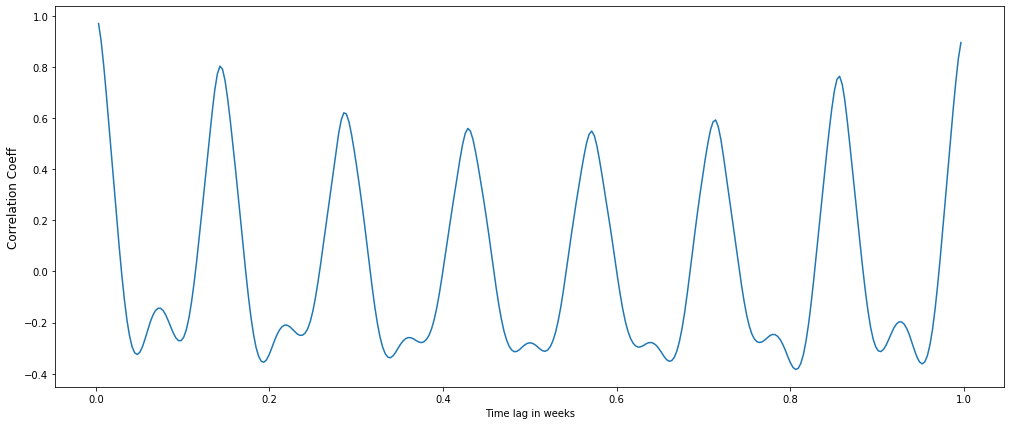

In [14]:
# Autocorrelation in timeseries (Weeks)
# The correlation coefficient is a measure of the linear correlation between two variables.
# 48 read per day per 7 days a week
timeLags = np.arange(1,48*7)
autoCorr = [df.value.autocorr(lag=dt) for dt in timeLags]
plt.figure(figsize=(17,7))
plt.plot(1.0/(48*7)*timeLags, autoCorr);
plt.xlabel('Time lag in weeks'); plt.ylabel('Correlation Coeff', fontsize=12);

# Featurization 

We have created new columns from timestamp. We can also generate additional new features from the timestamp. 
- (1) Adding day of a week in addition to the day of a month
- (2) The average of rides per a particular hour for the same day of the week. 
- (3) Number of rides during the day and during the night.

In [15]:
# (1) Adding day of the week.
df['Weekday'] = df.timestamp.dt.weekday

In [16]:
df.head(3)

,timestamp,value,Year,Month,Day,Hour,Weekday
0,2014-07-01 00:00:00,10844,2014,7,1,0,1
1,2014-07-01 00:30:00,8127,2014,7,1,0,1
2,2014-07-01 01:00:00,6210,2014,7,1,1,1


In [17]:
# (2) Adding the average of rides grouped by the weekday and hour
# 7 Days, 24 Hours = 168 values
len(df[:7344].groupby(df.Weekday.astype(str) + ' ' + df.Hour.astype(str))['value'].mean().to_dict())

168

In [18]:
df['avg_hour_day'] = df.Weekday.astype(str) + ' ' + df.Hour.astype(str)
df.head(3)

,timestamp,value,Year,Month,Day,Hour,Weekday,avg_hour_day
0,2014-07-01 00:00:00,10844,2014,7,1,0,1,1 0
1,2014-07-01 00:30:00,8127,2014,7,1,0,1,1 0
2,2014-07-01 01:00:00,6210,2014,7,1,1,1,1 1


In [19]:
df.avg_hour_day = df.avg_hour_day.replace(df[:7344].groupby(df.Weekday.astype(str) + ' ' + df.Hour.astype(str))['value'].mean().to_dict())
df.head(10)

,timestamp,value,Year,Month,Day,Hour,Weekday,avg_hour_day
0,2014-07-01 00:00:00,10844,2014,7,1,0,1,8764.000000
1,2014-07-01 00:30:00,8127,2014,7,1,0,1,8764.000000
2,2014-07-01 01:00:00,6210,2014,7,1,1,1,5185.272727
3,2014-07-01 01:30:00,4656,2014,7,1,1,1,5185.272727
4,2014-07-01 02:00:00,3820,2014,7,1,2,1,3112.181818
5,2014-07-01 02:30:00,2873,2014,7,1,2,1,3112.181818
6,2014-07-01 03:00:00,2369,2014,7,1,3,1,2075.431818
7,2014-07-01 03:30:00,2064,2014,7,1,3,1,2075.431818
8,2014-07-01 04:00:00,2221,2014,7,1,4,1,2083.613636
9,2014-07-01 04:30:00,2158,2014,7,1,4,1,2083.613636


In [20]:
# (3) Featuring the number of rides during the day and during the night.
# We define the day time to be any hours between 6 AM and 10 PM while Night time where usually there is less 
# demand is any time between 10:00 PM and 6:00 AM
df['day_time'] = ((df['Hour'] >= 6) & (df['Hour'] <= 22)).astype(int)

In [21]:
df.head()

,timestamp,value,Year,Month,Day,Hour,Weekday,avg_hour_day,day_time
0,2014-07-01 00:00:00,10844,2014,7,1,0,1,8764.000000,0
1,2014-07-01 00:30:00,8127,2014,7,1,0,1,8764.000000,0
2,2014-07-01 01:00:00,6210,2014,7,1,1,1,5185.272727,0
3,2014-07-01 01:30:00,4656,2014,7,1,1,1,5185.272727,0
4,2014-07-01 02:00:00,3820,2014,7,1,2,1,3112.181818,0


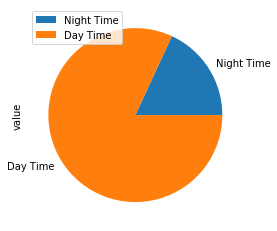

In [22]:
df.groupby(['day_time']).sum().plot(kind='pie', y='value', labels=['Night Time', 'Day Time']) 

Text(0, 0.5, 'Frequency')

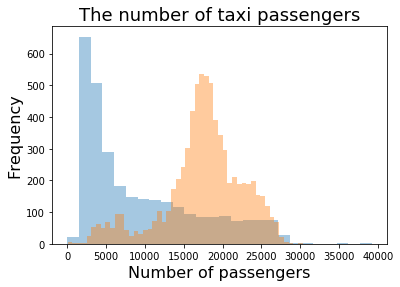

In [23]:
sns.distplot(df.loc[df['day_time'] == 0]['value'], kde = False)
sns.distplot(df.loc[df['day_time'] == 1]['value'], kde = False);
plt.title('The number of taxi passengers', fontsize=18)
plt.xlabel('Number of passengers', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

### Data Preperation 

In [24]:
df.head(3)

,timestamp,value,Year,Month,Day,Hour,Weekday,avg_hour_day,day_time
0,2014-07-01 00:00:00,10844,2014,7,1,0,1,8764.000000,0
1,2014-07-01 00:30:00,8127,2014,7,1,0,1,8764.000000,0
2,2014-07-01 01:00:00,6210,2014,7,1,1,1,5185.272727,0


In [25]:
# Normalizing the values
standard_scaler = preprocessing.StandardScaler()
scaled_data = standard_scaler.fit_transform(df[['Hour', 'day_time', 'Weekday', 'avg_hour_day', 'value']])

In [26]:
scaled_df = df.copy()

In [27]:
scaled_df['Hour'] = scaled_data[:,0]
scaled_df['day_time'] = scaled_data[:,1]
scaled_df['Weekday'] = scaled_data[:,2]
scaled_df['avg_hour_day'] = scaled_data[:,3]
scaled_df['value'] = scaled_data[:,4]
scaled_df.head(3)

,timestamp,value,Year,Month,Day,Hour,Weekday,avg_hour_day,day_time
0,2014-07-01 00:00:00,-0.618745,2014,7,1,-1.661325,-1.005865,-1.002380,-1.558387
1,2014-07-01 00:30:00,-1.010291,2014,7,1,-1.661325,-1.005865,-1.002380,-1.558387
2,2014-07-01 01:00:00,-1.286549,2014,7,1,-1.516862,-1.005865,-1.546894,-1.558387


In [28]:
# Specifying how many values to predict
time_step = 1 

### Splitting the dataset

In [29]:
training_size = int(len(scaled_df) * 0.9)
training, testing = scaled_df[0:training_size], scaled_df[training_size:len(df)]
print('Size of the dataset: %d' % (len(scaled_df)))
print('Training examples: %d' % (len(training)))
print('Testing examples: %d' % (len(testing)))

Size of the dataset: 10320
Training examples: 9288
Testing examples: 1032


In [30]:
# training features: Value, Hour, day_time
X_train = training[['value', 'Hour', 'day_time']].to_numpy()
y_train = scaled_df[time_step:testing.index[0]]['value'].to_numpy()

In [31]:
# testing data
X_test = testing[0:-time_step][['value', 'Hour', 'day_time']].to_numpy()
y_test = scaled_df[testing.index[0] + time_step:]['value'].to_numpy()

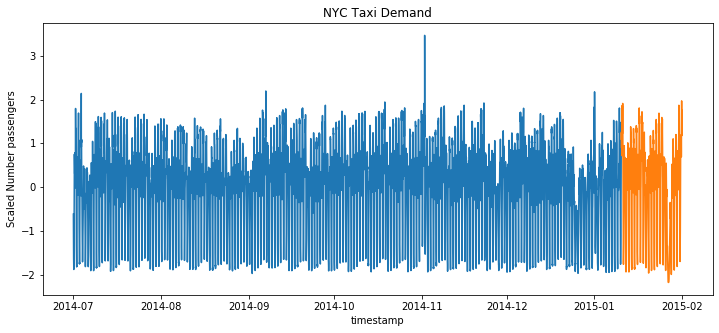

In [32]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(training['timestamp'], X_train[:,0])
ax.plot(testing['timestamp'][0:-1], X_test[:,0])
ax.set_title('NYC Taxi Demand')
plt.xlabel('timestamp')
plt.ylabel('Scaled Number passengers')
plt.show()

### Creating the data sequence 

In [33]:
y_train

array([-1.01029084, -1.28654908, -1.51049551, ...,  0.53067386,
        0.6817008 ,  1.06142978])

In [34]:
y_train[-X_train.shape[0]:]

array([-1.01029084, -1.28654908, -1.51049551, ...,  0.53067386,
        0.6817008 ,  1.06142978])

In [35]:
# create sequences of (48-two readings per hour) data points for each training example
def create_sequence(dataset, length):
    data_sequences = []
    for index in range(len(dataset) - length):
        data_sequences.append(dataset[index: index + length])
    return np.asarray(data_sequences)

In [36]:
X_train = create_sequence(X_train, 48)
X_test  = create_sequence(X_test, 48)
y_train = y_train[-X_train.shape[0]:]
y_test  = y_test[-X_test.shape[0]:]

In [37]:
y_train[0]

-0.2547238406089097

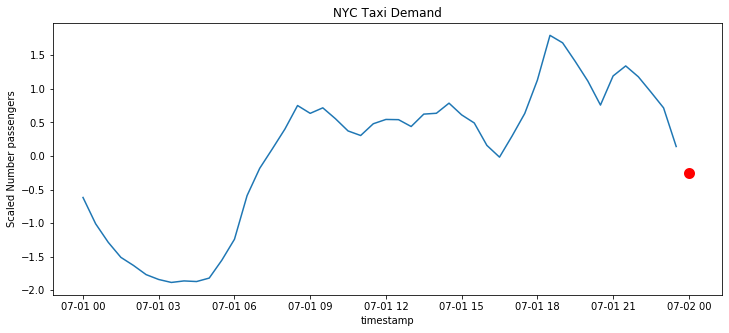

In [38]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(training[0:48]['timestamp'], X_train[0,:,0])
ax.scatter(training[48:49]['timestamp'], y_train[0], color='red', linewidth=5.0)
ax.set_title('NYC Taxi Demand')
plt.xlabel('timestamp')
plt.ylabel('Scaled Number passengers')
plt.show()

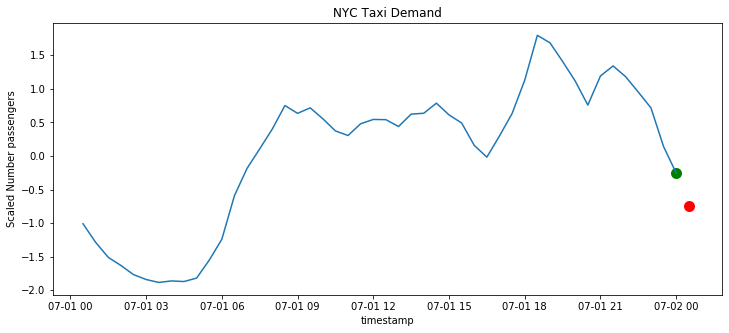

In [39]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(training[1:49]['timestamp'], X_train[1,:,0])
ax.scatter(training[48:49]['timestamp'], y_train[0], color='green', linewidth=5.0)
ax.scatter(training[49:50]['timestamp'], y_train[1], color='red', linewidth=5.0)
ax.set_title('NYC Taxi Demand')
plt.xlabel('timestamp')
plt.ylabel('Scaled Number passengers')
plt.show()

In [40]:
print("X_train shape={}, and y_train shape={}".format(X_train.shape, y_train.shape))
print("X_test shape={}, and y_test shape={}".format(X_test.shape, y_test.shape))

X_train shape=(9240, 48, 3), and y_train shape=(9240,)
X_test shape=(983, 48, 3), and y_test shape=(983,)


## Model Building 

In [60]:
# Build the model
model = Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[-1])))
model.add(Dropout(0.5))
model.add(LSTM(20,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

In [61]:
# Training the model
history = model.fit(X_train, y_train, batch_size=128, epochs=50)

Epoch 1/50
9240/9240 [==============================] - 27s 3ms/step - loss: 0.3509
Epoch 2/50
9240/9240 [==============================] - 25s 3ms/step - loss: 0.1942
Epoch 3/50
9240/9240 [==============================] - 27s 3ms/step - loss: 0.1535
Epoch 4/50
9240/9240 [==============================] - 26s 3ms/step - loss: 0.1362
Epoch 5/50
9240/9240 [==============================] - 26s 3ms/step - loss: 0.1268
Epoch 6/50
9240/9240 [==============================] - 25s 3ms/step - loss: 0.1177
Epoch 7/50
9240/9240 [==============================] - 26s 3ms/step - loss: 0.1073
Epoch 8/50
9240/9240 [==============================] - 26s 3ms/step - loss: 0.1040
Epoch 9/50
9240/9240 [==============================] - 27s 3ms/step - loss: 0.1008
Epoch 10/50
9240/9240 [==============================] - 26s 3ms/step - loss: 0.0967
Epoch 11/50
9240/9240 [==============================] - 25s 3ms/step - loss: 0.0973
Epoch 12/50
9240/9240 [==============================] - 27s 3ms/step - lo

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 48, 64)            17408     
_________________________________________________________________
dropout_7 (Dropout)          (None, 48, 64)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 20)                6800      
_________________________________________________________________
dropout_8 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 24,229
Trainable params: 24,229
Non-trainable params: 0
_________________________________________________________________


### Evaluation

In [63]:
# create the list of difference between prediction and test data
predictions = model.predict(X_test)
len(predictions)

983

In [64]:
def evaluate_predictions(predictions, y_test, outliers):
    ratio = []
    differences = []
    for pred in range(len(y_test)):
        ratio.append((y_test[pred]/predictions[pred])-1)
        differences.append(abs(y_test[pred]- predictions[pred]))
    
    
    n_outliers = int(len(differences) * outliers)
    outliers = pd.Series(differences).astype(float).nlargest(n_outliers)
    
    return ratio, differences, outliers

In [65]:
ratio, differences, outliers = evaluate_predictions(predictions, y_test, 0.01)

In [66]:
for index in outliers.index: 
    outliers[index] = predictions[index]
outliers

350    1.019550
502    0.532796
551    0.849376
117    0.975624
726   -0.179125
804   -1.457460
165    1.089767
900   -1.303246
86    -0.153390
dtype: float64

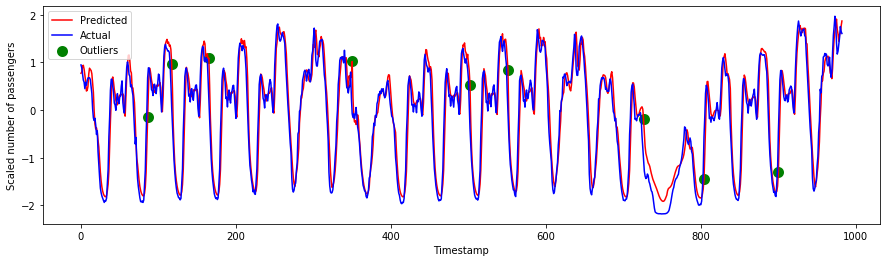

In [68]:
# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(y_test,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Outliers')
plt.xlabel('Timestamp')
plt.ylabel('Scaled number of passengers')
plt.legend(loc='upper left')
plt.show()